In [60]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [61]:
# 关闭警告显示
warnings.filterwarnings('ignore')

# 读取并查看【商品销售数据.xlsx】工作簿的数据
data = pd.read_excel('./课程素材/商品销售数据.xlsx')
data.head(10)

,订单号,邮编,商品描述,数量,发货日期,价格,用户 ID,国家
0,536365,85123A,清蒸臭豆腐,6,2010/01/12 08:26,2.55,17850.0,英国
1,536365,71053,self-raising面粉,6,2010/01/12 08:26,3.39,17850.0,英国
2,536365,84406B,佛跳墙,8,2010/01/12 08:26,2.75,17850.0,英国
3,536365,84029G,五香熏蛋,6,2010/01/12 08:26,3.39,17850.0,英国
4,536365,84029E,鸭胸脯肉,6,2010/01/12 08:26,3.39,17850.0,英国
5,536365,22752,羊血,2,2010/01/12 08:26,7.65,17850.0,英国
6,536365,21730,奥来克桂花莲藕粉,6,2010/01/12 08:26,4.25,17850.0,英国
7,536366,22633,腌韭菜花,6,2010/01/12 08:28,1.85,17850.0,英国
8,536366,22632,燔鱼片,6,2010/01/12 08:28,1.85,17850.0,英国
9,536367,84879,酱莴笋,32,2010/01/12 08:34,1.69,13047.0,英国


In [62]:
data = data.dropna(subset=['用户 ID'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95955 entries, 0 to 95973
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     95955 non-null  object 
 1   邮编      95955 non-null  object 
 2   商品描述    95955 non-null  object 
 3   数量      95955 non-null  int64  
 4   发货日期    95955 non-null  object 
 5   价格      95955 non-null  float64
 6   用户 ID   95955 non-null  float64
 7   国家      95955 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.6+ MB


In [63]:
data[data.duplicated()]
data = data.drop_duplicates()

In [64]:
data.describe()

,数量,价格,用户 ID
count,95953.000000,95953.000000,95953.000000
mean,13.583515,3.174992,15444.412160
std,243.636430,33.545414,1742.750499
min,-48.000000,0.000000,12346.000000
25%,2.000000,1.250000,14121.000000
50%,6.000000,1.950000,15513.000000
75%,12.000000,3.750000,17017.000000
max,74215.000000,8142.750000,18287.000000


In [65]:
data = data[data['数量'] > 0]

In [66]:
# 计算“总金额”
data['总金额'] = data['数量'] * data['价格']
data.head(10)

,订单号,邮编,商品描述,数量,发货日期,价格,用户 ID,国家,总金额
0,536365,85123A,清蒸臭豆腐,6,2010/01/12 08:26,2.55,17850.0,英国,15.30
1,536365,71053,self-raising面粉,6,2010/01/12 08:26,3.39,17850.0,英国,20.34
2,536365,84406B,佛跳墙,8,2010/01/12 08:26,2.75,17850.0,英国,22.00
3,536365,84029G,五香熏蛋,6,2010/01/12 08:26,3.39,17850.0,英国,20.34
4,536365,84029E,鸭胸脯肉,6,2010/01/12 08:26,3.39,17850.0,英国,20.34
5,536365,22752,羊血,2,2010/01/12 08:26,7.65,17850.0,英国,15.30
6,536365,21730,奥来克桂花莲藕粉,6,2010/01/12 08:26,4.25,17850.0,英国,25.50
7,536366,22633,腌韭菜花,6,2010/01/12 08:28,1.85,17850.0,英国,11.10
8,536366,22632,燔鱼片,6,2010/01/12 08:28,1.85,17850.0,英国,11.10
9,536367,84879,酱莴笋,32,2010/01/12 08:34,1.69,13047.0,英国,54.08


In [67]:
# 按【订单号】和【用户 ID】分组后，获取【发货日期】列的最大值和【总金额】列的总和
grouped_data = data.groupby(['订单号', '用户 ID'], as_index=False).agg({'发货日期': 'max', '总金额': 'sum'})
grouped_data.head(10)

,订单号,用户 ID,发货日期,总金额
0,581587,12680.0,2011-09-12 12:50:00,249.45
1,536365,17850.0,2010/01/12 08:26,139.12
2,536366,17850.0,2010/01/12 08:28,22.20
3,536367,13047.0,2010/01/12 08:34,278.73
4,536374,15100.0,2010/01/12 09:09,350.40
5,536376,15291.0,2010/01/12 09:32,328.80
6,536378,14688.0,2010/01/12 09:37,444.98
7,536385,17420.0,2010/01/12 09:56,130.85
8,536386,16029.0,2010/01/12 09:57,508.20
9,536387,16029.0,2010/01/12 09:58,3193.92


In [68]:
# 计算时间间隔（天数）
today = '2012-01-01 00:00:00'
pd.to_datetime(today) - pd.to_datetime(grouped_data['发货日期'])

0      110 days 11:10:00
1      718 days 15:34:00
2      718 days 15:32:00
3      718 days 15:26:00
4      718 days 14:51:00
              ...       
4574   110 days 11:52:00
4575   110 days 11:41:00
4576   110 days 11:40:00
4577   110 days 11:39:00
4578   110 days 11:29:00
Name: 发货日期, Length: 4579, dtype: timedelta64[ns]

In [69]:
# 计算时间间隔
today = '2012-01-01 00:00:00'
grouped_data['时间间隔'] = (pd.to_datetime(today) - pd.to_datetime(grouped_data['发货日期'])).dt.days
grouped_data

,订单号,用户 ID,发货日期,总金额,时间间隔
0,581587,12680.0,2011-09-12 12:50:00,249.45,110
1,536365,17850.0,2010/01/12 08:26,139.12,718
2,536366,17850.0,2010/01/12 08:28,22.20,718
3,536367,13047.0,2010/01/12 08:34,278.73,718
4,536374,15100.0,2010/01/12 09:09,350.40,718
...,...,...,...,...,...
4574,581572,16705.0,2011/09/12 12:08,250.52,110
4575,581579,17581.0,2011/09/12 12:19,903.62,110
4576,581581,17581.0,2011/09/12 12:20,51.18,110
4577,581582,17581.0,2011/09/12 12:21,29.88,110


In [70]:
# 按【用户 ID】分组后，获取【时间间隔】列的最小值、【订单号】列的数量，以及【总金额】列的总和
rfm_data = grouped_data.groupby('用户 ID', as_index=False).agg({'时间间隔': 'min', '订单号': 'count', '总金额': 'sum'})
rfm_data

,用户 ID,时间间隔,订单号,总金额
0,12346.0,347,1,77183.60
1,12349.0,40,1,1757.55
2,12352.0,94,8,2506.04
3,12359.0,30,4,6357.73
4,12360.0,74,3,2662.06
...,...,...,...,...
1084,18250.0,332,1,349.27
1085,18251.0,109,1,4314.72
1086,18270.0,288,2,283.15
1087,18277.0,21,1,110.38


In [71]:
# 修改列名为：用户 ID、时间间隔、总次数和总金额
rfm_data.columns = ['用户 ID', '时间间隔', '总次数', '总金额']
rfm_data

,用户 ID,时间间隔,总次数,总金额
0,12346.0,347,1,77183.60
1,12349.0,40,1,1757.55
2,12352.0,94,8,2506.04
3,12359.0,30,4,6357.73
4,12360.0,74,3,2662.06
...,...,...,...,...
1084,18250.0,332,1,349.27
1085,18251.0,109,1,4314.72
1086,18270.0,288,2,283.15
1087,18277.0,21,1,110.38


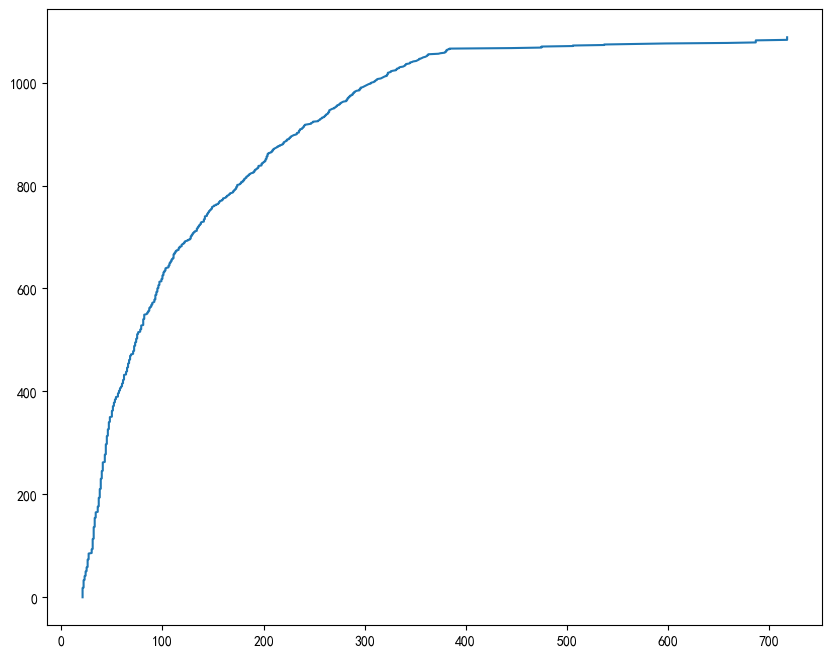

In [72]:
# 设置中文显示字体
plt.rcParams['font.family'] = ['SimHei']

# 画 R 值（时间间隔）的折线图，便于后续对数据进行分组
plt.figure(figsize=(10, 8))
x = rfm_data['时间间隔'].sort_values()
y = rfm_data.index
plt.plot(x, y)

In [73]:
# 定义函数按照区间划分 R 值
def caculate_r(s):
    if s <= 100:
        return 5
    elif s <= 200:
        return 4
    elif s <= 300:
        return 3
    elif s <= 400:
        return 2
    else:
        return 1
    
    


,用户 ID,时间间隔,总次数,总金额,F评分
13,12415.0,46,21,124675.73,3
22,12471.0,32,30,19824.05,5
43,12569.0,21,32,4106.69,5
52,12621.0,26,20,13689.67,3
63,12683.0,26,15,8476.57,2
67,12709.0,21,15,9736.52,2
89,12841.0,25,25,4020.25,4
130,13089.0,27,96,58720.88,5
211,13576.0,32,18,6715.09,2
224,13695.0,23,15,2504.13,2


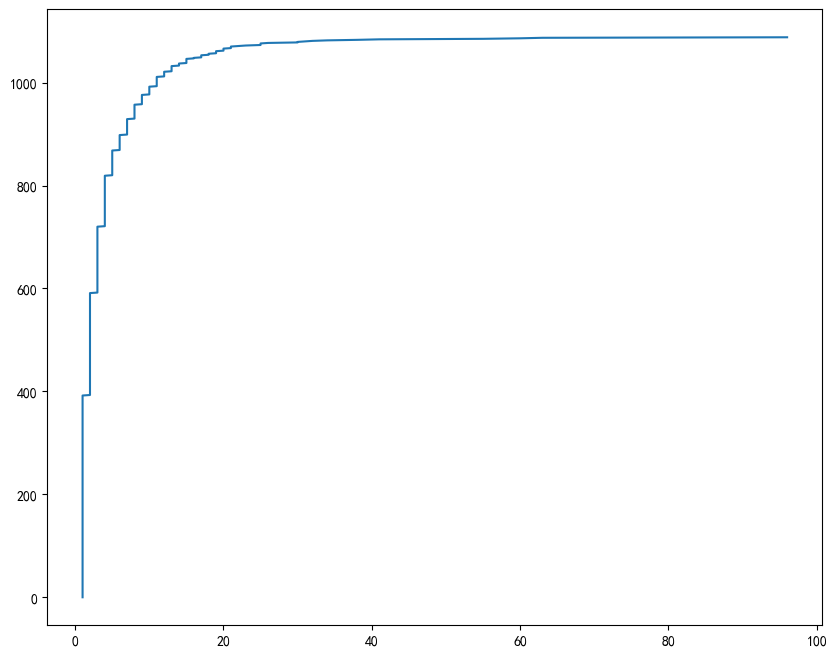

In [76]:
plt.rcParams['font.family'] = ['SimHei']

# 画 R 值（时间间隔）的折线图，便于后续对数据进行分组
plt.figure(figsize=(10, 8))
x = rfm_data['总次数'].sort_values()
y = rfm_data.index
plt.plot(x, y)

def caculate_f(data):
    if data >= 30:
        return 5
    elif 25 <= data <30:
        return 4
    elif 20 <= data < 25:
        return 3
    elif 15 <= data < 20:
        return 2
    elif data < 15:
        return 1
    
rfm_data['F评分'] = rfm_data['总次数'].agg(caculate_f)
rfm_data[rfm_data['F评分'] > 1]

,用户 ID,时间间隔,总次数,总金额,F评分,M评分
0,12346.0,347,1,77183.60,1,5
1,12349.0,40,1,1757.55,1,1
2,12352.0,94,8,2506.04,1,2
3,12359.0,30,4,6357.73,1,4
4,12360.0,74,3,2662.06,1,2
...,...,...,...,...,...,...
1084,18250.0,332,1,349.27,1,1
1085,18251.0,109,1,4314.72,1,3
1086,18270.0,288,2,283.15,1,1
1087,18277.0,21,1,110.38,1,1


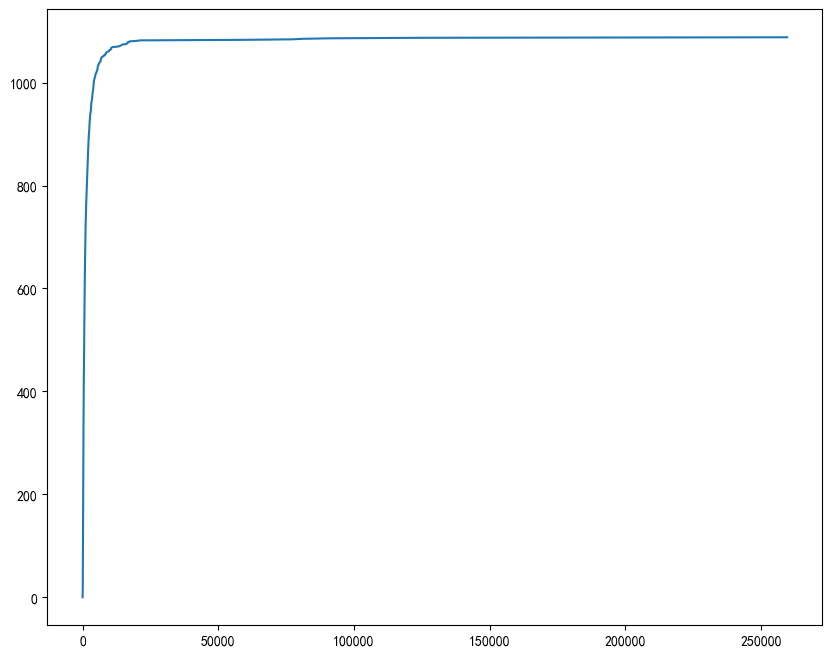

In [78]:
# 画 M 值（总金额）的折线图，便于后续对数据进行分组
plt.figure(figsize=(10, 8))
x = rfm_data['总金额'].sort_values()
y = rfm_data.index
plt.plot(x, y)

# 定义函数按照区间划分 M 值
def caculate_m(s):
    if s <= 2000:
        return 1
    elif s <= 4000:
        return 2
    elif s <= 6000:
        return 3
    elif s <= 8000:
        return 4
    else:
        return 5

# 对 M 值进行评分
rfm_data['M评分'] = rfm_data['总金额'].agg(caculate_m)
rfm_data

In [82]:
# r_avg = rfm_data['R评分'].mean()
f_avg = rfm_data['F评分'].mean()
m_avg = rfm_data['M评分'].mean()

print('F评分的均值为{}，M评分的均值为{}'.format(f_avg, m_avg))

F评分的均值为1.0964187327823691，M评分的均值为1.376492194674013
